In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Load the Dataset

In [3]:
df = pd.read_csv(r"D:\Anaconda\data set\Churn_Modelling.csv")

In [4]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
df.dtypes

In [5]:
print('The Numerical variables are ')
list(df.select_dtypes(include=[np.number]).columns.values)
num_col= df.select_dtypes(include=[np.number]).columns.values
print('The Categorical variables are ')
list(df.select_dtypes(include=[np.object]).columns.values)
cat_col= df.select_dtypes(include=[np.object]).columns.values
#print('There are {0} numerical columns and {1} categorical columns'.format())   

The Numerical variables are 
The Categorical variables are 


C:\Users\Hari\AppData\Local\Temp\ipykernel_11760\2586098159.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  list(df.select_dtypes(include=[np.object]).columns.values)
C:\Users\Hari\AppData\Local\Temp\ipykernel_11760\2586098159.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_col= df.select_dtypes(include=[np.object]).columns.values


In [6]:
num_col

array(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'], dtype=object)

# 3a.Univarient annalysis

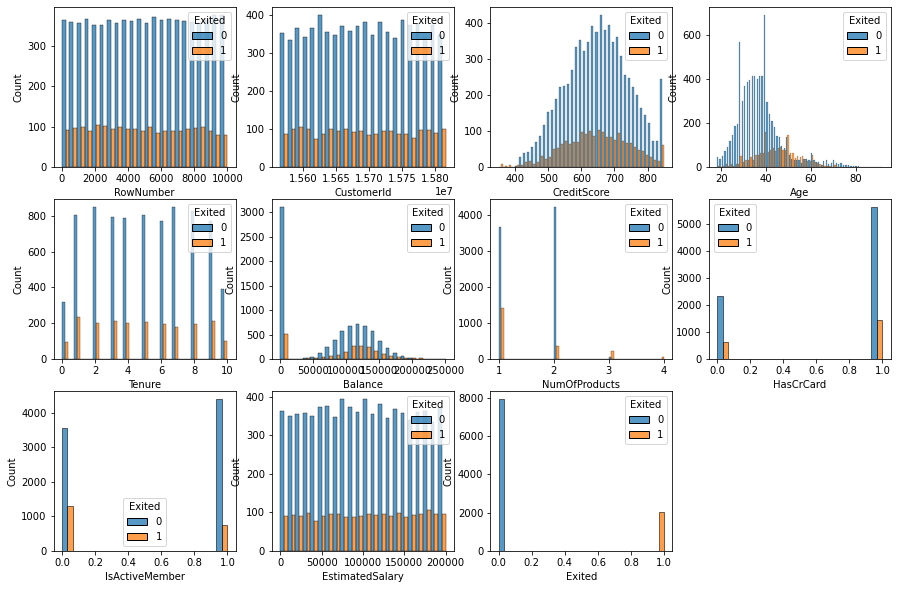

In [7]:
plt.figure(figsize = (15,10))
for i in enumerate(num_col):
    plt.subplot(3,4, i[0]+1)
    _= sns.histplot(df, x=i[1], hue = 'Exited',multiple="dodge")

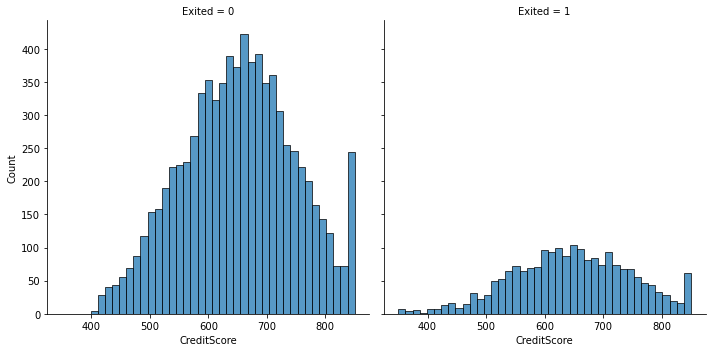

In [8]:
sns.displot(df, x="CreditScore", col="Exited", multiple="dodge")

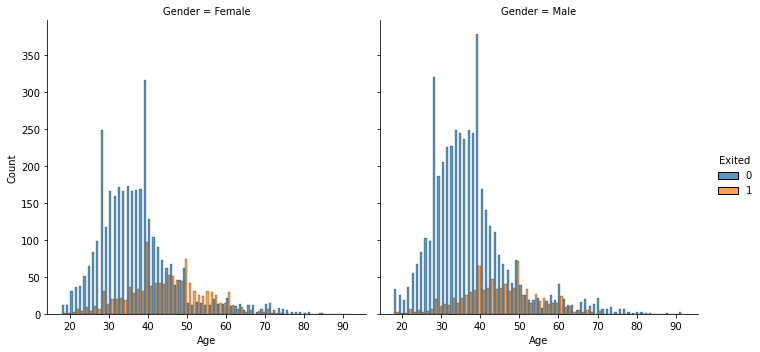

In [9]:
sns.displot(df, x="Age", col="Gender",hue = 'Exited', multiple="dodge")

<Figure size 720x720 with 0 Axes>

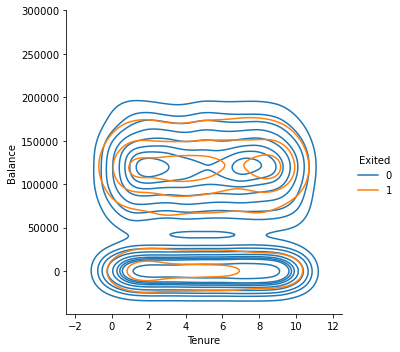

In [13]:
plt.figure(figsize= (10,10))
sns.displot(df, x="Tenure", y="Balance", hue="Exited", kind= 'kde')

# 3b.Bivarient analysis

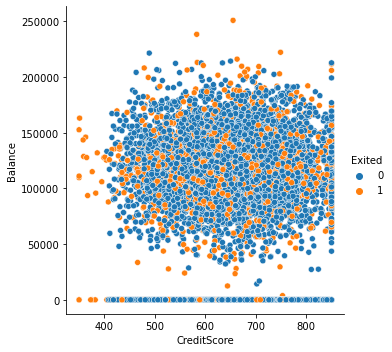

In [14]:
sns.relplot(x = 'CreditScore', y = 'Balance',hue = 'Exited',kind = 'scatter',data = df)

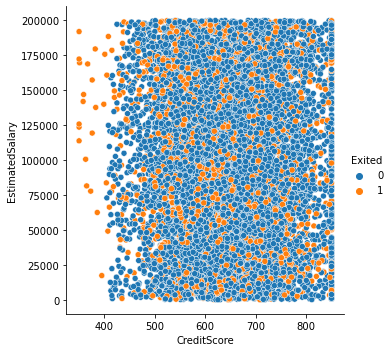

In [15]:
sns.relplot(x = 'CreditScore',y = 'EstimatedSalary',hue = 'Exited',kind = 'scatter',data = df)

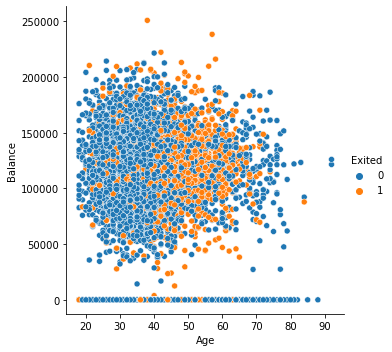

In [16]:
sns.relplot(x = 'Age',y = 'Balance',hue = 'Exited',kind = 'scatter',data = df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.5% of the points

<Figure size 1080x504 with 0 Axes>

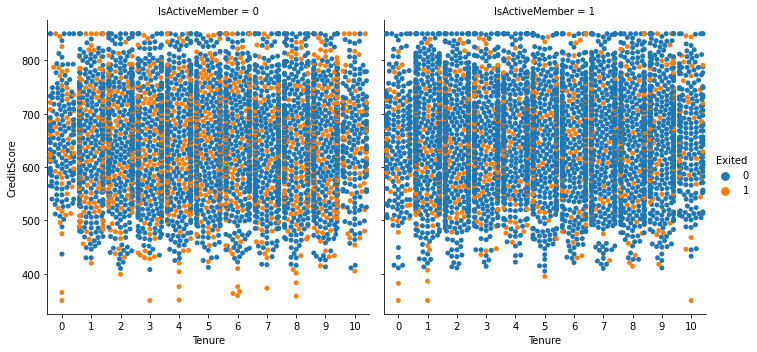

In [18]:
plt.figure(figsize=(15,7))
sns.catplot(x="Tenure", y="CreditScore", hue="Exited", col="IsActiveMember",kind="swarm", data=df)

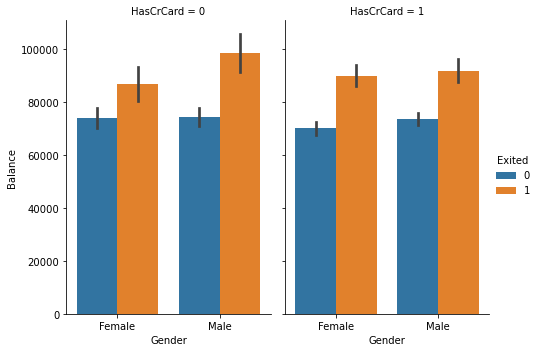

In [20]:
sns.catplot(x="Gender", y="Balance", hue="Exited",
            col="HasCrCard", aspect=.7,
            kind="bar", data=df)

Text(0.5, 1.0, 'For Spain')

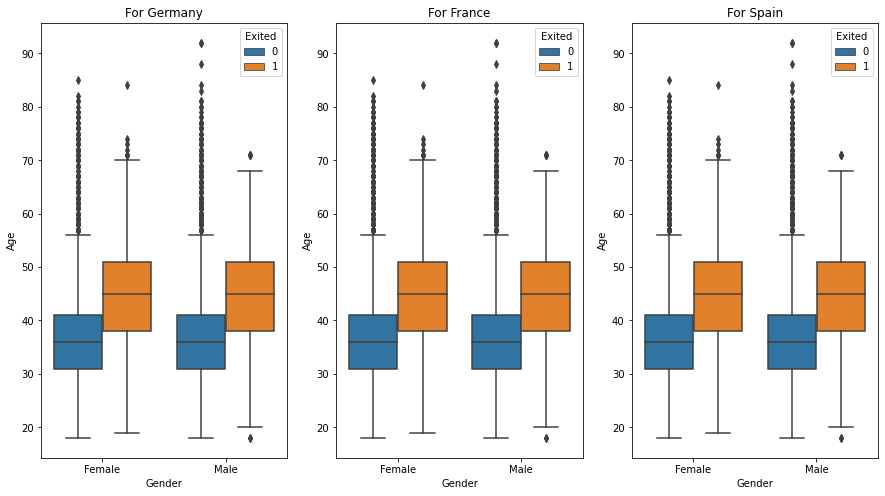

In [21]:
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
sns.boxplot(x= 'Gender', y= 'Age', data = df, hue = 'Exited')
plt.title('For Germany')
plt.subplot(1,3,2)
sns.boxplot(x= 'Gender', y= 'Age', data = df, hue = 'Exited')
plt.title('For France')
plt.subplot(1,3,3)
sns.boxplot(x= 'Gender', y= 'Age', data = df, hue = 'Exited')
plt.title('For Spain')

# 3c.Multivariant analysis

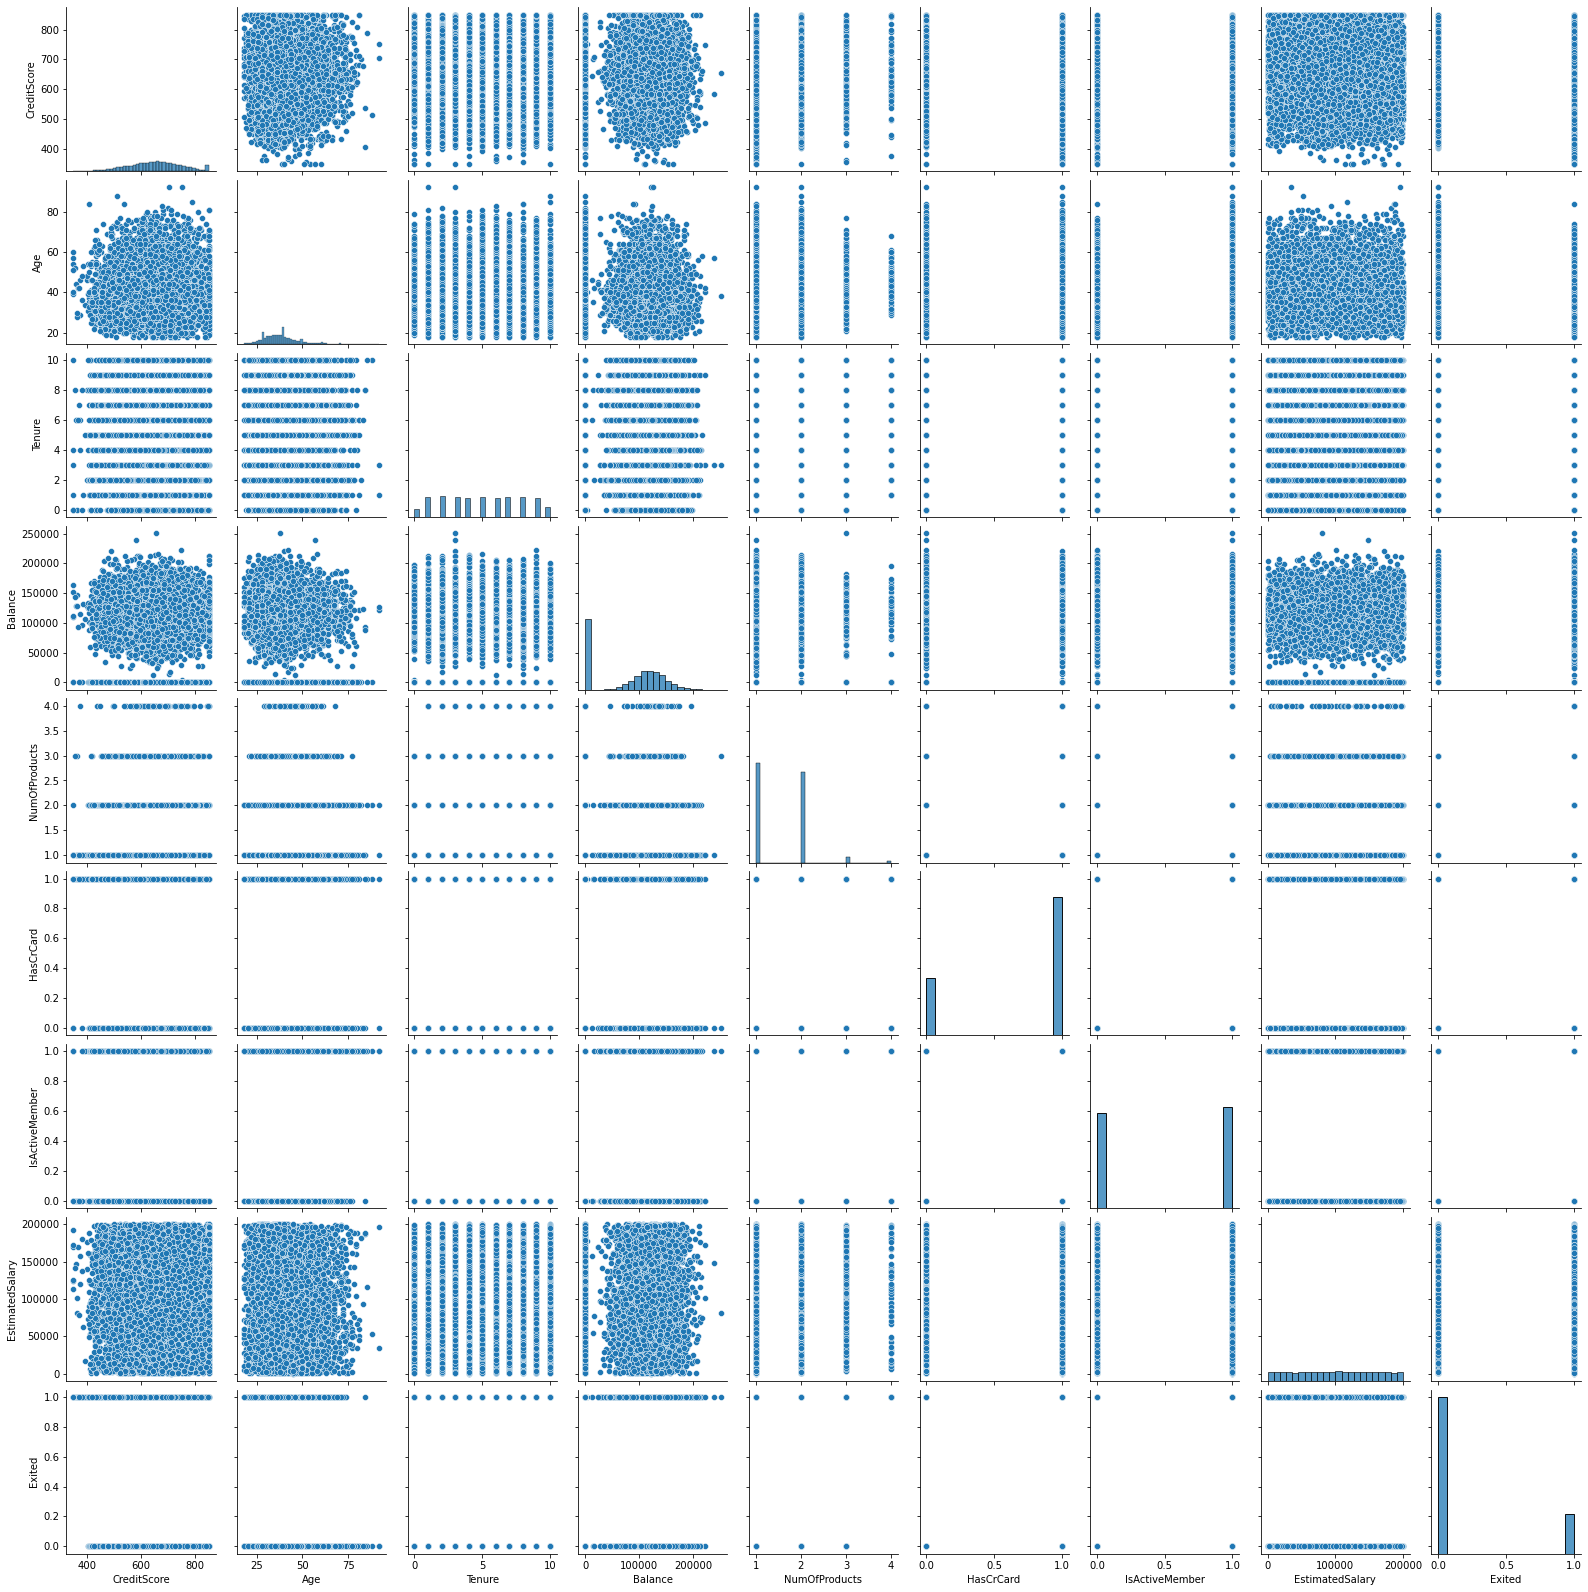

In [22]:
sns.pairplot(df)

# 4.Perform descriptive statistics on the dataset.

In [40]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# 5.Handle the Missing values

In [41]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [42]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# 6.Find the outliers and replace the outliers

In [43]:
df.skew()#its will give information to the out layer

C:\Users\Hari\AppData\Local\Temp\ipykernel_4016\1153688333.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()#its will give information to the out layer


RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

there is no outliers in the given dataset

# 7.Split the data into dependent and independent variables

In [13]:
x = df.iloc[:,3:13].values
y = df.iloc[:,13:14].values

In [14]:
x.shape

(10000, 10)

In [15]:
y.shape

(10000, 1)

# 8.Check for Categorical columns and perform encoding.

In [51]:
from sklearn.compose import ColumnTransformer

In [52]:
from sklearn.preprocessing import OneHotEncoder

In [53]:
ct = ColumnTransformer([("oh",OneHotEncoder(),[1,2])],remainder="passthrough")

In [54]:
x = ct.fit_transform(x)

In [55]:
x.shape

(10000, 13)

# 9.Split the data into training and testing

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [62]:
x_test.shape

(2000, 13)

In [63]:
x_train.shape

(8000, 13)

In [64]:
y_test.shape

(2000, 1)

In [65]:
y_train.shape

(8000, 1)

# 10.Scale the independent variables

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
sc = StandardScaler()

In [68]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [69]:
x_test

array([[-0.95692675,  1.62776996, -0.57427105, ...,  0.66011376,
         0.97628121,  1.62185911],
       [ 1.04501206, -0.61433742, -0.57427105, ...,  0.66011376,
        -1.02429504,  0.504204  ],
       [-0.95692675, -0.61433742,  1.74133801, ...,  0.66011376,
         0.97628121, -0.41865644],
       ...,
       [-0.95692675, -0.61433742,  1.74133801, ...,  0.66011376,
        -1.02429504,  0.72775202],
       [-0.95692675,  1.62776996, -0.57427105, ...,  0.66011376,
         0.97628121, -1.54162886],
       [-0.95692675,  1.62776996, -0.57427105, ...,  0.66011376,
        -1.02429504,  1.62356528]])